## KNN OPTIMIZED CODE WITH BALANCING WITH SMOTE & NORMALIZATION


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:

# import pandas as pd

# encodings = ['latin1', 'ISO-8859-1', 'cp1252']
# for encoding in encodings:
#     try:
#         df = pd.read_csv('hyperthyroidism3_FinalData_April.csv', encoding=encoding)
#         break
#     except UnicodeDecodeError:
#         print(f"Failed to read with encoding {encoding}")
# else:
#     raise UnicodeDecodeError("None of the specified encodings could decode the file")

# # X = df.values
# df.head()


In [3]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)


In [4]:
df.head()

,aphp,nhph,tertiary_hp,secondary_hp,age,gender,height,weight,bmi,marital_status,...,nephrolithiasis,bone_specific_alp,corrected_calcium_by_albumin,serum_calcium_phosphorus_ratio,pf_index,alp_combined_with_cl_po4,third_surgery_pathology_report,fourth_surgery_pathology_report,triglycerides,hdl_cholesterol
0,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,60,1,0,0,0.0,1,...,0,0.0,11.2,2.8,147.0,0.0,0,0,0,0
2,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1,0,0,0,55,1,170,73,0.0,1,...,0,0.0,12.1,4.4,413.0,0.0,0,0,0,0


In [5]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values  

# nan_values = df.isna()
# print(df.isna().sum())

# print(df[nan_values])

## Splitting & Using KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import time
import pandas as pd
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()

training_time = end_time - start_time

print(f"Training time: {training_time} seconds")


Training time: 0.049002647399902344 seconds


## Using Evaluation Metrics

Accuracy =  69.33333333333334 %
Precision =  0.6892109500805152
Recall =  0.6914027149321267
F1-score =  0.689803992087754


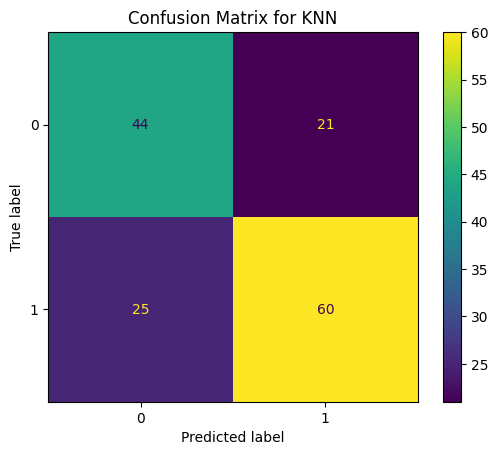

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.68      0.66        65
           1       0.74      0.71      0.72        85

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.69       150
weighted avg       0.70      0.69      0.69       150



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay,confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN')
plt.show()

# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

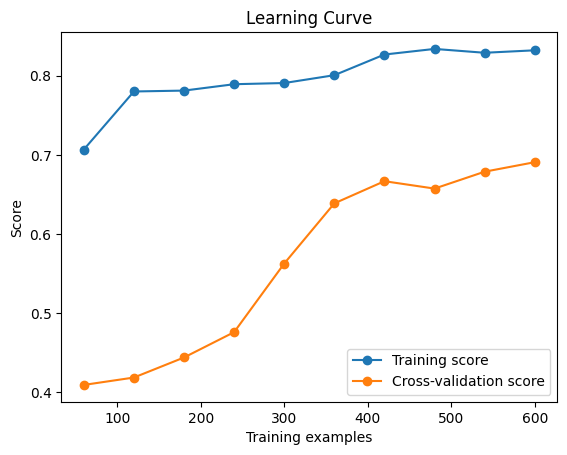

In [8]:
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


--- Model Training (KNN) ---
Training Wall Time: 0.0049 seconds
Training CPU Time (User): 0.0156 seconds
Training CPU Time (System): 0.0000 seconds
Memory RSS after training: 201.26 MB

--- Model Prediction (KNN) ---
Prediction Wall Time (for 150 samples): 0.0925 seconds
Prediction CPU Time (User): 0.0000 seconds
Prediction CPU Time (System): 0.0000 seconds

--- Model Evaluation (KNN) ---
Accuracy = 69.33 %
Precision (Macro) = 0.6892
Recall (Macro) = 0.6914
F1-score (Macro) = 0.6898

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66        65
           1       0.74      0.71      0.72        85

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.69       150
weighted avg       0.70      0.69      0.69       150


--- Model Parameters (KNN) ---
Number of Neighbors (k): 5
Weights: uniform
Algorithm: auto
Leaf Size: 30
Minkowski Power (p): 2
Distance Metric: minkowski
Numb

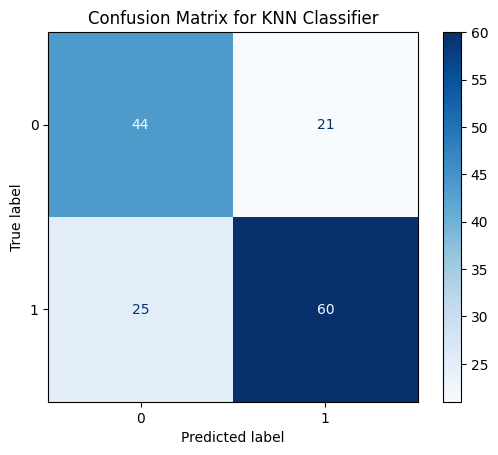


Displaying Learning Curve...


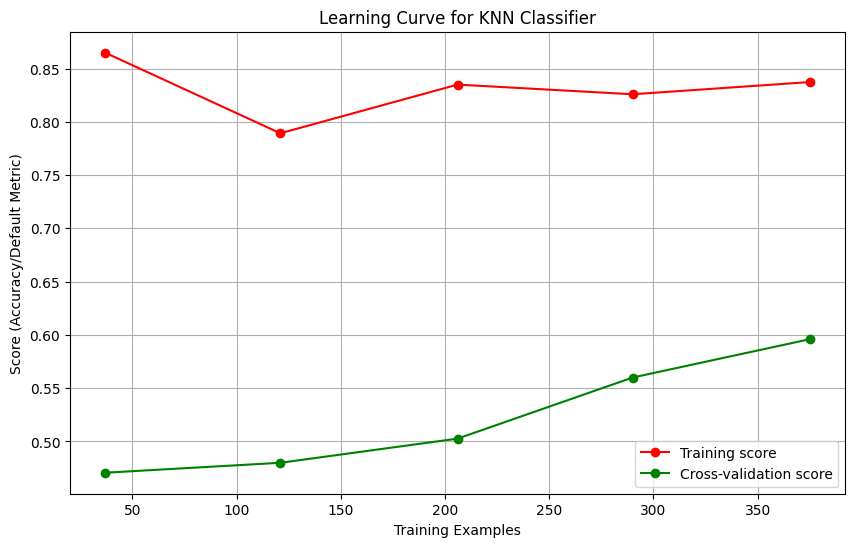


--- Generating Visualizations for Collected Metrics (KNN) ---


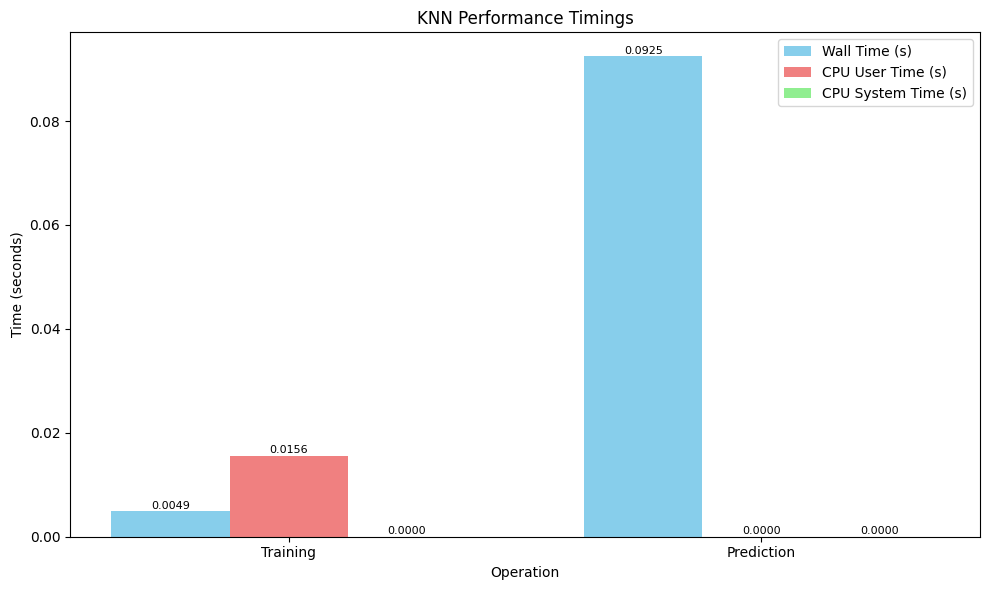

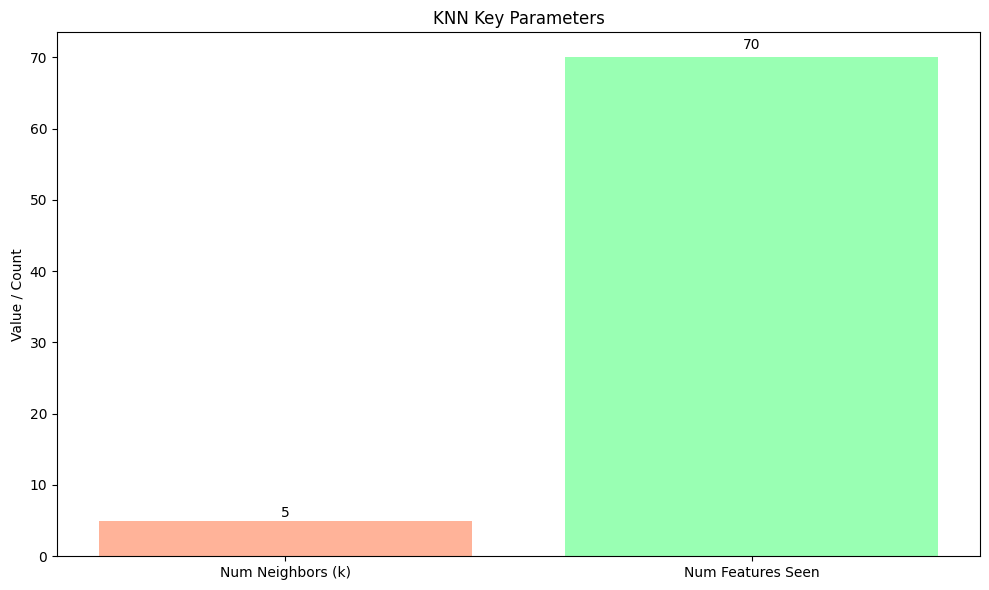

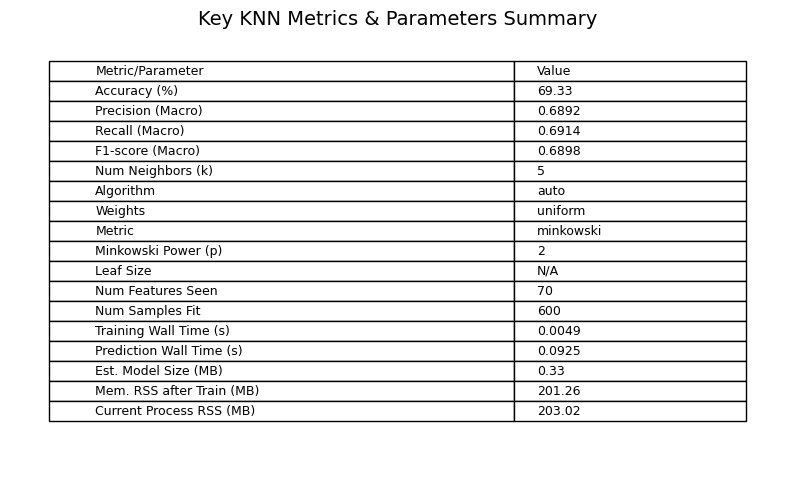


--- Analysis Complete ---


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
import sys # For model object size

# Attempt to import psutil for CPU and memory stats
try:
    import psutil
    psutil_available = True
    process = psutil.Process() # Get current process
except ImportError:
    psutil_available = False
    print("psutil library not found. CPU and memory usage stats will not be available.")
    print("To install psutil, run: pip install psutil")

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import LabelEncoder # Though not strictly needed for KNN if y is numeric

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 0. Initialize Metrics Storage ---
# Dictionary to store all metrics for later visualization
all_metrics = {}

# --- 1. Load Data ---
# !!! IMPORTANT: Make sure this path is correct for your system !!!
df = pd.read_csv(r"C:\Users\musab\desktop\ht\htOld\dataset\hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)

if df.empty:
    print("DataFrame is empty after dropping NaNs. Exiting.")
    sys.exit()

# Assuming the first column is the target and the rest are features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values # Assuming y is already numeric (0, 1, etc.)

# Convert feature names to strings, handle potential non-string column names
feature_names = [str(col) for col in df.columns[1:]]
# Get class names for display (ensure they are strings for matplotlib if needed)
# If y is numeric (e.g., 0, 1), these will be numeric. Convert to string for labels.
class_names_display = [str(c) for c in np.unique(y)]


# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Initialize Model ---
# Using KNeighborsClassifier as requested
knn_classifier = KNeighborsClassifier(n_neighbors=5) # n_neighbors from user script

# --- 4. Train Model and Measure Resources ---
print("\n--- Model Training (KNN) ---")
training_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_train = process.cpu_times()
    mem_info_before_train = process.memory_info().rss

knn_classifier.fit(X_train, y_train) # KNN "training" is mostly storing data

training_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_train = process.cpu_times()
    mem_info_after_train = process.memory_info().rss

all_metrics['training_wall_time'] = training_end_time_wall - training_start_time_wall
print(f"Training Wall Time: {all_metrics['training_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['training_cpu_time_user'] = cpu_times_after_train.user - cpu_times_before_train.user
    all_metrics['training_cpu_time_system'] = cpu_times_after_train.system - cpu_times_before_train.system
    all_metrics['memory_rss_after_training_mb'] = mem_info_after_train / (1024**2)
    print(f"Training CPU Time (User): {all_metrics['training_cpu_time_user']:.4f} seconds")
    print(f"Training CPU Time (System): {all_metrics['training_cpu_time_system']:.4f} seconds")
    print(f"Memory RSS after training: {all_metrics['memory_rss_after_training_mb']:.2f} MB")
else:
    all_metrics.update({'training_cpu_time_user': 0, 'training_cpu_time_system': 0, 'memory_rss_after_training_mb': 0})


# --- 5. Make Predictions and Measure Resources ---
print("\n--- Model Prediction (KNN) ---")
prediction_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_predict = process.cpu_times()

y_pred = knn_classifier.predict(X_test)

prediction_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_predict = process.cpu_times()

all_metrics['prediction_wall_time'] = prediction_end_time_wall - prediction_start_time_wall
print(f"Prediction Wall Time (for {len(X_test)} samples): {all_metrics['prediction_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['prediction_cpu_time_user'] = cpu_times_after_predict.user - cpu_times_before_predict.user
    all_metrics['prediction_cpu_time_system'] = cpu_times_after_predict.system - cpu_times_before_predict.system
    print(f"Prediction CPU Time (User): {all_metrics['prediction_cpu_time_user']:.4f} seconds")
    print(f"Prediction CPU Time (System): {all_metrics['prediction_cpu_time_system']:.4f} seconds")
else:
    all_metrics.update({'prediction_cpu_time_user': 0, 'prediction_cpu_time_system': 0})

# --- 6. Evaluate Model ---
print("\n--- Model Evaluation (KNN) ---")
all_metrics['accuracy'] = accuracy_score(y_test, y_pred) * 100
all_metrics['precision_macro'] = precision_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['recall_macro'] = recall_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['f1_score_macro'] = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy = {all_metrics['accuracy']:.2f} %")
print(f"Precision (Macro) = {all_metrics['precision_macro']:.4f}")
print(f"Recall (Macro) = {all_metrics['recall_macro']:.4f}")
print(f"F1-score (Macro) = {all_metrics['f1_score_macro']:.4f}")

print("\nClassification Report:")
# Ensure target_names are strings for classification_report
target_names_report = [str(c) for c in knn_classifier.classes_] if hasattr(knn_classifier, 'classes_') else class_names_display
print(classification_report(y_test, y_pred, zero_division=0, labels=knn_classifier.classes_ if hasattr(knn_classifier, 'classes_') else None, target_names=target_names_report))

# --- 7. Model Complexity / Parameters ---
print("\n--- Model Parameters (KNN) ---")
params = knn_classifier.get_params()
all_metrics['n_neighbors'] = params.get('n_neighbors')
all_metrics['weights'] = params.get('weights')
all_metrics['algorithm'] = params.get('algorithm')
all_metrics['leaf_size'] = params.get('leaf_size')
all_metrics['p_minkowski'] = params.get('p')
all_metrics['metric'] = params.get('metric')

print(f"Number of Neighbors (k): {all_metrics['n_neighbors']}")
print(f"Weights: {all_metrics['weights']}")
print(f"Algorithm: {all_metrics['algorithm']}")
print(f"Leaf Size: {all_metrics['leaf_size']}")
print(f"Minkowski Power (p): {all_metrics['p_minkowski']}")
print(f"Distance Metric: {all_metrics['metric']}")

if hasattr(knn_classifier, 'n_features_in_'):
    all_metrics['n_features_in'] = knn_classifier.n_features_in_
    print(f"Number of Features Seen: {all_metrics['n_features_in']}")
else:
    all_metrics['n_features_in'] = X_train.shape[1] # Fallback
    print(f"Number of Features Seen (from X_train): {all_metrics['n_features_in']}")

if hasattr(knn_classifier, 'n_samples_fit_'):
    all_metrics['n_samples_fit'] = knn_classifier.n_samples_fit_
    print(f"Number of Samples Fit: {all_metrics['n_samples_fit']}")
else:
    all_metrics['n_samples_fit'] = X_train.shape[0] # Fallback
    print(f"Number of Samples Fit (from X_train): {all_metrics['n_samples_fit']}")

if hasattr(knn_classifier, 'classes_'):
    all_metrics['classes_learned'] = knn_classifier.classes_
    print(f"Classes Learned by KNN: {all_metrics['classes_learned']}")
else:
    all_metrics['classes_learned'] = np.unique(y_train)


# Estimating model size (KNN stores the training data or a tree structure)
model_size_bytes = sys.getsizeof(knn_classifier)
if hasattr(knn_classifier, '_fit_X'): # The actual training data stored
    model_size_bytes += knn_classifier._fit_X.nbytes
if hasattr(knn_classifier, '_y'): # The labels of training data
    model_size_bytes += knn_classifier._y.nbytes
if hasattr(knn_classifier, '_tree'): # If a tree-based algorithm is used (e.g., 'kd_tree', 'ball_tree')
    model_size_bytes += sys.getsizeof(knn_classifier._tree)


all_metrics['estimated_model_size_kb'] = model_size_bytes / 1024
all_metrics['estimated_model_size_mb'] = model_size_bytes / (1024**2)
print(f"Estimated Model Object Size in Memory: {all_metrics['estimated_model_size_kb']:.2f} KB ({all_metrics['estimated_model_size_mb']:.2f} MB)")

if psutil_available:
    all_metrics['current_process_rss_mb'] = process.memory_info().rss / (1024**2)
    all_metrics['current_process_vms_mb'] = process.memory_info().vms / (1024**2)
    print(f"Current Process RSS Memory: {all_metrics['current_process_rss_mb']:.2f} MB")
    print(f"Current Process VMS Memory: {all_metrics['current_process_vms_mb']:.2f} MB")
else:
    all_metrics.update({'current_process_rss_mb': 0, 'current_process_vms_mb': 0})

# --- 8. Visualizations (From User's Script and Adapted) ---

# Confusion Matrix
print("\nDisplaying Confusion Matrix...")
try:
    if len(y_test) > 0 and len(y_pred) > 0:
        # Use stringified class names for display
        cm_display_labels = [str(c) for c in knn_classifier.classes_] if hasattr(knn_classifier, 'classes_') else class_names_display
        cm_labels = knn_classifier.classes_ if hasattr(knn_classifier, 'classes_') else np.unique(y)

        conf_matrix = confusion_matrix(y_test, y_pred, labels=cm_labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=cm_display_labels)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix for KNN Classifier')
        plt.show()
    else:
        print("Skipping Confusion Matrix: y_test or y_pred is empty.")
except Exception as e:
    print(f"Could not plot Confusion Matrix: {e}")


# Learning Curve
print("\nDisplaying Learning Curve...")
try:
    if len(y) >= 5 : # cv=5
        n_splits_cv = min(5, len(np.unique(y)))
        if n_splits_cv < 2 :
            print(f"Skipping Learning Curve: Not enough unique classes in target variable for {n_splits_cv} splits (min 2 required).")
        else:
            # Create a new instance of KNN for learning curve to avoid issues with fitted model
            lc_knn_classifier = KNeighborsClassifier(n_neighbors=all_metrics.get('n_neighbors', 5))

            train_sizes, train_scores, test_scores = learning_curve(
                lc_knn_classifier, X, y, cv=n_splits_cv,
                n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 5)
            )
            plt.figure(figsize=(10, 6))
            plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
            plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
            plt.xlabel("Training Examples")
            plt.ylabel("Score (Accuracy/Default Metric)")
            plt.title("Learning Curve for KNN Classifier")
            plt.legend(loc="best")
            plt.grid(True)
            plt.show()
    else:
        print("Skipping Learning Curve: Not enough samples in X or y for cross-validation.")
except Exception as e:
    print(f"Could not plot Learning Curve: {e}")


# --- 9. New Visualizations for Collected Metrics (Adapted for KNN) ---
print("\n--- Generating Visualizations for Collected Metrics (KNN) ---")

# Plot 1: Performance Timings
fig_perf_knn, ax_perf_knn = plt.subplots(figsize=(10, 6))
time_categories = ['Training', 'Prediction']
wall_times = [all_metrics.get('training_wall_time', 0), all_metrics.get('prediction_wall_time', 0)]
cpu_user_times = [all_metrics.get('training_cpu_time_user', 0), all_metrics.get('prediction_cpu_time_user', 0)]
cpu_system_times = [all_metrics.get('training_cpu_time_system', 0), all_metrics.get('prediction_cpu_time_system', 0)]

bar_width = 0.25
index = np.arange(len(time_categories))

bar1 = ax_perf_knn.bar(index - bar_width, wall_times, bar_width, label='Wall Time (s)', color='skyblue')
bar2 = ax_perf_knn.bar(index, cpu_user_times, bar_width, label='CPU User Time (s)', color='lightcoral')
bar3 = ax_perf_knn.bar(index + bar_width, cpu_system_times, bar_width, label='CPU System Time (s)', color='lightgreen')

ax_perf_knn.set_xlabel('Operation')
ax_perf_knn.set_ylabel('Time (seconds)')
ax_perf_knn.set_title('KNN Performance Timings')
ax_perf_knn.set_xticks(index)
ax_perf_knn.set_xticklabels(time_categories)
ax_perf_knn.legend()
for bar_group in [bar1, bar2, bar3]:
    for bar in bar_group:
        yval = bar.get_height()
        offset_factor = 0.001 * (max(wall_times + cpu_user_times + cpu_system_times) if any(wall_times + cpu_user_times + cpu_system_times) else 1)
        ax_perf_knn.text(bar.get_x() + bar.get_width()/2.0, yval + offset_factor, f'{yval:.4f}', ha='center', va='bottom', fontsize=8)
fig_perf_knn.tight_layout()
plt.show()


# Plot 2: KNN Parameters/Complexity
fig_comp_knn, ax_comp_knn = plt.subplots(figsize=(10, 6))
# Key numerical parameters for KNN complexity visualization
param_names_knn = ['Num Neighbors (k)', 'Leaf Size', 'Num Features Seen']
param_values_knn = [
    all_metrics.get('n_neighbors', 0),
    all_metrics.get('leaf_size', 0) if all_metrics.get('algorithm') in ['kd_tree', 'ball_tree'] else 0, # Leaf size only relevant for tree algos
    all_metrics.get('n_features_in', 0)
]
colors_knn = ['#FFB399', '#ADC2FF', '#99FFB3']

# Filter out parameters that are 0 if they are not applicable (like leaf_size for brute)
valid_indices = [i for i, val in enumerate(param_values_knn) if not (param_names_knn[i] == 'Leaf Size' and val == 0 and all_metrics.get('algorithm') not in ['kd_tree', 'ball_tree'])]
param_names_knn_filtered = [param_names_knn[i] for i in valid_indices]
param_values_knn_filtered = [param_values_knn[i] for i in valid_indices]
colors_knn_filtered = [colors_knn[i] for i in valid_indices]


if param_values_knn_filtered: # Only plot if there are valid parameters to show
    bars_comp_knn = ax_comp_knn.bar(param_names_knn_filtered, param_values_knn_filtered, color=colors_knn_filtered)
    ax_comp_knn.set_ylabel('Value / Count')
    ax_comp_knn.set_title('KNN Key Parameters')
    for bar in bars_comp_knn:
        yval = bar.get_height()
        ax_comp_knn.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * yval if yval > 0 else 0.1 , f'{int(yval)}', ha='center', va='bottom')
else:
    ax_comp_knn.text(0.5, 0.5, "No applicable numerical parameters to display.", ha='center', va='center')
    ax_comp_knn.set_title('KNN Key Parameters')

fig_comp_knn.tight_layout()
plt.show()


# Plot 3: Summary Table of Key Metrics for KNN
fig_table_knn, ax_table_knn = plt.subplots(figsize=(10, 6)) # Adjusted size
ax_table_knn.axis('tight')
ax_table_knn.axis('off')

table_data_knn = [
    ["Metric/Parameter", "Value"],
    ["Accuracy (%)", f"{all_metrics.get('accuracy', 0):.2f}"],
    ["Precision (Macro)", f"{all_metrics.get('precision_macro', 0):.4f}"],
    ["Recall (Macro)", f"{all_metrics.get('recall_macro', 0):.4f}"],
    ["F1-score (Macro)", f"{all_metrics.get('f1_score_macro', 0):.4f}"],
    ["Num Neighbors (k)", f"{all_metrics.get('n_neighbors', 'N/A')}"],
    ["Algorithm", f"{all_metrics.get('algorithm', 'N/A')}"],
    ["Weights", f"{all_metrics.get('weights', 'N/A')}"],
    ["Metric", f"{all_metrics.get('metric', 'N/A')}"],
    ["Minkowski Power (p)", f"{all_metrics.get('p_minkowski', 'N/A') if all_metrics.get('metric') == 'minkowski' else 'N/A'}"],
    ["Leaf Size", f"{all_metrics.get('leaf_size', 'N/A') if all_metrics.get('algorithm') in ['kd_tree', 'ball_tree'] else 'N/A'}"],
    ["Num Features Seen", f"{all_metrics.get('n_features_in', 'N/A')}"],
    ["Num Samples Fit", f"{all_metrics.get('n_samples_fit', 'N/A')}"],
    ["Training Wall Time (s)", f"{all_metrics.get('training_wall_time', 0):.4f}"],
    ["Prediction Wall Time (s)", f"{all_metrics.get('prediction_wall_time', 0):.4f}"],
    ["Est. Model Size (MB)", f"{all_metrics.get('estimated_model_size_mb', 0):.2f}"],
    ["Mem. RSS after Train (MB)", f"{all_metrics.get('memory_rss_after_training_mb', 0):.2f}"],
]
if psutil_available:
     table_data_knn.extend([
        ["Current Process RSS (MB)", f"{all_metrics.get('current_process_rss_mb', 0):.2f}"],
     ])

table_knn = ax_table_knn.table(cellText=table_data_knn, colLabels=None, cellLoc='left', loc='center', colWidths=[0.5, 0.25])
table_knn.auto_set_font_size(False)
table_knn.set_fontsize(9)
table_knn.scale(1.2, 1.2)
ax_table_knn.set_title('Key KNN Metrics & Parameters Summary', fontsize=14, y=0.95)
plt.show()

print("\n--- Analysis Complete ---")
